In [16]:
%pip install -q wordcloud
%pip install -q dash

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import matplotlib as plt 
import plotly.graph_objects as go

In [18]:
df=pd.read_csv(r'C:\Users\Anuj\OneDrive\Desktop\covid 2023 analysis\Latest Covid-19 India Status.csv')
df

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.00,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.00,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.00,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.00,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.00,98.56,1.44,40100376
5,Chandigarh,100693,0,99508,1185,0.00,98.82,1.18,30501026
6,Chhattisgarh,1187695,0,1173505,14190,0.00,98.81,1.19,28900667
7,Dadra and Nagar Haveli and Daman and Diu,11592,0,11588,4,0.00,99.97,0.03,231502578
8,Delhi,2040910,14,2014230,26666,0.00,98.69,1.31,773997
9,Goa,263346,3,259329,4014,0.00,98.47,1.52,3772103


# EDA

In [19]:
df.columns.tolist()

['State/UTs',
 'Total Cases',
 'Active',
 'Discharged',
 'Deaths',
 'Active Ratio',
 'Discharge Ratio',
 'Death Ratio',
 'Population']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


### cleaning data and checking

Missing Values:
 State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

Data Types:
 State/UTs           object
Total Cases          int64
Active               int64
Discharged           int64
Deaths               int64
Active Ratio       float64
Discharge Ratio    float64
Death Ratio        float64
Population           int64
dtype: object

Summary Statistics:
         Total Cases       Active    Discharged         Deaths  Active Ratio  \
count  3.600000e+01    36.000000  3.600000e+01      36.000000     36.000000   
mean   1.249975e+06    50.333333  1.235146e+06   14778.527778      0.005000   
std    1.846038e+06   207.118048  1.820328e+06   27221.140636      0.026673   
min    1.076600e+04     0.000000  1.063700e+04       4.000000      0.000000   
25%    1.065430e+05     0.000000  1.055395e+05    1124.250000      0.000000   
50%    6.14091

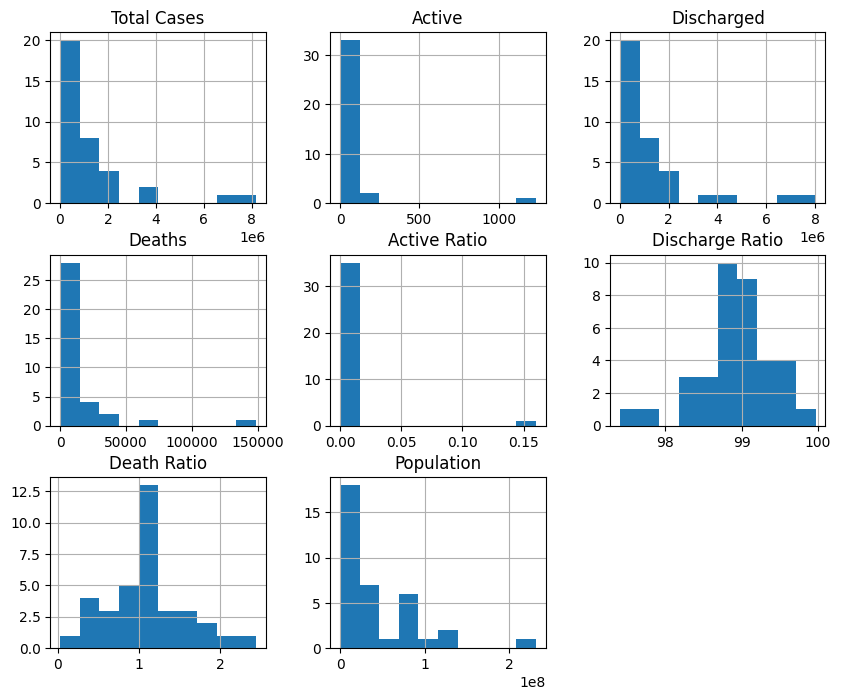

In [21]:
# missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# data types
data_types = df.dtypes
print("\nData Types:\n", data_types)

# Removing duplicates
df.drop_duplicates(inplace=True)

# Descriptive Statistics
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)

# Histograms for numerical columns
numeric_cols = ['Total Cases', 'Active', 'Discharged', 'Deaths', 'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population']
df[numeric_cols].hist(figsize=(10, 8))

# Calculating Correlation Matrix for Numeric Columns
numeric_cols = ['Total Cases', 'Active', 'Discharged', 'Deaths', 'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population']
numeric_data = df[numeric_cols]
correlation_matrix = numeric_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Calculating Case Fatality Rate
df['Case Fatality Rate'] = (df['Deaths'] / df['Total Cases']) * 100
print(df["Case Fatality Rate"])

# Data Visualization

### Case Fatality Rate

In [22]:
df['Case Fatality Rate'] = (df['Deaths'] / df['Total Cases']) * 100
Max_to_Min = df.sort_values(by='Case Fatality Rate', ascending=False)
fig = px.bar(Max_to_Min, x='State/UTs', y='Case Fatality Rate', title='Case Fatality Rate by State/UTs')
fig.update_xaxes(title='State/UTs')
fig.update_yaxes(title='Case Fatality Rate (%)')
fig.show()

### Deaths by states top_10

In [23]:
Max_Min = df.sort_values(by='Deaths', ascending=False)
top_10 = Max_Min.head(10)
fig = px.bar(top_10, x='State/UTs', y='Deaths', color='State/UTs', title='Deaths by State/UTs')
fig.update_xaxes(title='State/UTs')
fig.update_yaxes(title='Deaths')
fig.show()
highest_death_value = top_10['Deaths'].max()
state_with_highest_deaths = top_10.loc[top_10['Deaths'].idxmax()]['State/UTs']

print(f"Highest number of deaths: {highest_death_value}")
print(f"State/UT with highest deaths: {state_with_highest_deaths}")

Highest number of deaths: 148558
State/UT with highest deaths: Maharashtra


### heatmap for state and other numeric columns

In [24]:
heatmap_data = df[['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths', 'Population', 'Case Fatality Rate']]

heatmap_data.set_index('State/UTs', inplace=True)
fig_heatmap = px.imshow(heatmap_data.values,
                        labels=dict(x="Metrics", y="State/UTs"),
                        x=['Total Cases', 'Active', 'Discharged', 'Deaths', 'Population', 'Case Fatality Rate'],
                        y=heatmap_data.index,
                        title='Heatmap of Relationships between States/UTs based on Numeric Values')
fig_heatmap.show()

### population of state

In [25]:
df_sorted = df.sort_values('Population', ascending=False)

fig_area = px.area(df_sorted, x='State/UTs', y='Population', title='Population of States/UTs',
                   labels={'State/UTs': 'States/UTs', 'Population': 'Population'})

state_highest_population = df_sorted.iloc[0]['State/UTs']
max_population = df_sorted.iloc[0]['Population']

fig_area.add_annotation(x=state_highest_population, y=max_population,
                       text=f"{state_highest_population}<br>Population: {max_population}",
                       showarrow=True, arrowhead=1)

fig_area.update_traces(mode='lines+markers', line=dict(width=2, color='blue'), marker=dict(size=8, color='blue'))

fig_area.show()

### wordcloud of states over Deaths 

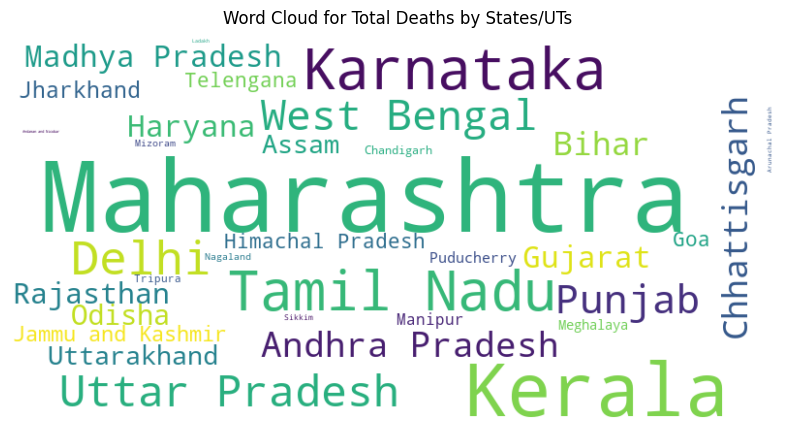

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
death_counts = df.groupby('State/UTs')['Deaths'].sum().reset_index()
state_death_dict = {state: deaths for state, deaths in zip(death_counts['State/UTs'], death_counts['Deaths'])}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(state_death_dict)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Total Deaths by States/UTs')
plt.show()

### Plots for total cases, population, CFRD, active, discharge, death and state

In [27]:
## Total cases from max to min 
fig_area_chart = px.area(df, x='State/UTs', y='Total Cases', title='Total Cases Over States')
fig_area_chart.show()

# Case Fatality Rate from max to min 
df_sorted_cfr = df.sort_values(by='Case Fatality Rate', ascending=False)

fig = px.area(df_sorted_cfr, x='State/UTs', y='Case Fatality Rate', title='Case Fatality Rate by State/UTs (Descending Order)')
fig.update_layout(xaxis_title='States/UTs', yaxis_title='Case Fatality Rate', yaxis_tickformat='.2%')
fig.show()

# Comparison of Multiple Metrics
fig_radar = px.line_polar(df, r=['Total Cases', 'Active', 'Discharged', 'Deaths'],
                          theta=['Cases', 'Active', 'Discharged', 'Deaths'], line_close=True,
                          title='Radar Chart - Metrics Comparison')
fig_radar.show()

# Total Cases vs. Population
fig_scatter = px.scatter(df, x='Total Cases', y='Population', color='State/UTs', title='Total Cases vs. Population')
fig_scatter.show()

# Case Fatality Rate Distribution
fig_hist = px.histogram(df, x='Case Fatality Rate', title='Case Fatality Rate Distribution',hover_name='State/UTs')
fig_hist.show()

# Active, Discharged, and Deaths
fig_stacked_bar = px.bar(df, x='State/UTs', y=['Active', 'Discharged', 'Deaths','Total Cases'],hover_data='Population',
                         title='Active, Discharged, Total cases, and Deaths by State/UTs', barmode='stack')
fig_stacked_bar.show()

# Comparison of Case Fatality Rate by State/UTs
fig_box_plot = px.box(df, x='State/UTs', y='Case Fatality Rate', title='Comparison of Case Fatality Rate by State/UTs')
fig_box_plot.show()

### dash app to compare two state based on other respective column 

In [28]:
import dash
from dash import dcc, html
import pandas as pd

df = pd.DataFrame(df)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id='state-dropdown1',
            options=[{'label': state, 'value': state} for state in df['State/UTs']],
            value=df['State/UTs'].iloc[0]
        ),
        dcc.Dropdown(
            id='state-dropdown2',
            options=[{'label': state, 'value': state} for state in df['State/UTs']],
            value=df['State/UTs'].iloc[1]
        )
    ]),
    dcc.Dropdown(
        id='data-dropdown',
        options=[
            {'label': 'Active Cases', 'value': 'Active'},
            {'label': 'Total Cases', 'value': 'Total Cases'},
            {'label': 'Deaths', 'value': 'Deaths'},
            {'label': 'Discharged', 'value': 'Discharged'},
            {'label': 'Population', 'value': 'Population'}
        ],
        value='Active'  
    ),
    dcc.Graph(id='data-graph')
])


@app.callback(
    dash.dependencies.Output('data-graph', 'figure'),
    [dash.dependencies.Input('state-dropdown1', 'value'),
     dash.dependencies.Input('state-dropdown2', 'value'),
     dash.dependencies.Input('data-dropdown', 'value')]
)
def update_graph(selected_state1, selected_state2, selected_data):
    filtered_df1 = df[df['State/UTs'] == selected_state1]
    filtered_df2 = df[df['State/UTs'] == selected_state2]

    return {
        'data': [
            {
                'x': [selected_state1, selected_state2],
                'y': [filtered_df1[selected_data].values[0], filtered_df2[selected_data].values[0]],
                'type': 'bar',
                'name': selected_data + f' ({selected_state1}, {selected_state2})'
            }
        ],
        'layout': {
            'title': f'{selected_state1} vs {selected_state2} - {selected_data}'
        }
    }


if __name__ == '__main__':
    app.run_server(debug=True)

# thanks